### Sign Language MNIST Dataset :

- https://www.kaggle.com/datasets/datamunge/sign-language-mnist?resource=download-directory
- Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z
- Columns : label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image (784 pixels) with grayscale values between 0-255

In [2]:
import pandas as pd
import string
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

import tensorflow as tf

#### Load dataset

In [6]:
df_train = pd.read_csv('Datasets/sign_mnist_train.csv')
df_val = pd.read_csv('Datasets/sign_mnist_test.csv')
print("Train = ",df_train.shape," Val = ",df_val.shape)
df_val.head()

Train =  (27455, 785)  Val =  (7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [7]:
# Add color dimension
# Reshape to images

x_train = df_train.iloc[:,1:].values.astype("float64")
x_train = x_train.reshape(-1,28,28,1)

y_train = df_train.iloc[:,0].values.astype("float64")

x_val = df_val.iloc[:,1:].values.astype("float64")
x_val = x_val.reshape(-1,28,28,1)

y_val = df_val.iloc[:,0].values.astype("float64")

print("Train = ",x_train.shape," ",y_train.shape," ",x_train.dtype,y_train.dtype)
print("Val = ",x_val.shape," ",y_val.shape," ",x_val.dtype,y_val.dtype)

Train =  (27455, 28, 28, 1)   (27455,)   float64 float64
Val =  (7172, 28, 28, 1)   (7172,)   float64 float64


#### EDA

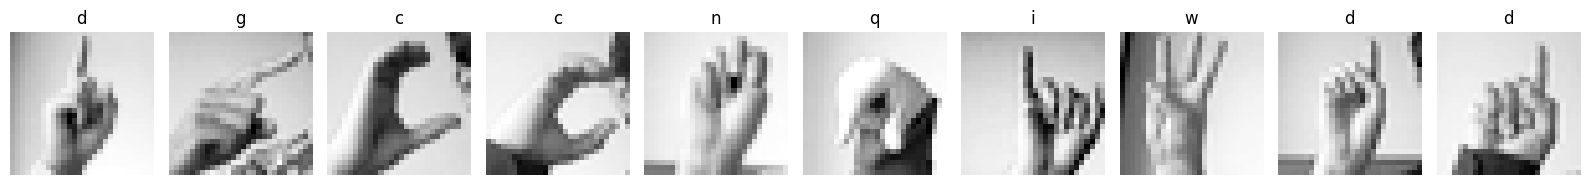

In [8]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    #print(img.shape)
    img = tf.keras.utils.array_to_img(img) #Converts a 3D Numpy array to a PIL Image instance
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(x_train, y_train)

#### Build MODEL

In [10]:
callback_cp = tf.keras.callbacks.ModelCheckpoint(
    filepath = 'Models/C2W4SignLanguageMNIST/Checkpoint/sign_model', #_{epoch}',
    monitor = 'val_accuracy',save_best_only = True,save_weights_only = True,verbose=1)

sign_model = tf.keras.models.Sequential([
    #rescale_layer,
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='softmax')
])

In [11]:
sign_model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [12]:
sign_model_hist = sign_model.fit(x=x_train,y=y_train,
                               validation_data = (x_val,y_val),
                               epochs = 5,
                               #steps_per_epoch = 100,
                               callbacks = [callback_cp])

Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 4.8058 - accuracy: 0.4926
Epoch 1: val_accuracy improved from -inf to 0.71807, saving model to Models/C2W4SignLanguageMNIST/Checkpoint/sign_model
100/100 [==============================] - 26s 248ms/step - loss: 4.8058 - accuracy: 0.4926 - val_loss: 0.9503 - val_accuracy: 0.7181
Epoch 2/5
100/100 [==============================] - ETA: 0s - loss: 0.4944 - accuracy: 0.8990
Epoch 2: val_accuracy improved from 0.71807 to 0.88567, saving model to Models/C2W4SignLanguageMNIST/Checkpoint/sign_model
100/100 [==============================] - 22s 220ms/step - loss: 0.4944 - accuracy: 0.8990 - val_loss: 0.5124 - val_accuracy: 0.8857
Epoch 3/5
100/100 [==============================] - ETA: 0s - loss: 0.5022 - accuracy: 0.9237
Epoch 3: val_accuracy did not improve from 0.88567
100/100 [==============================] - 23s 229ms/step - loss: 0.5022 - accuracy: 0.9237 - val_loss: 0.6414 - val_accuracy: 0.8518
Epoch 4/5
100/100 [

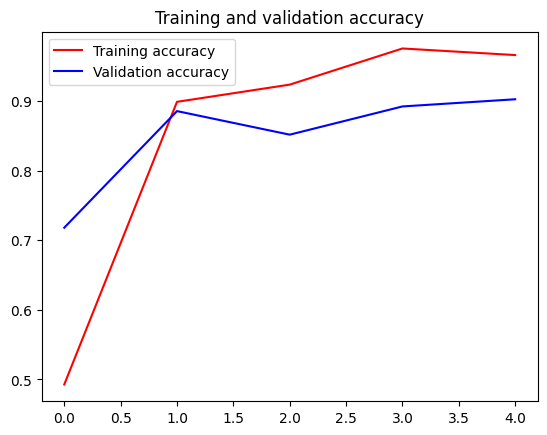

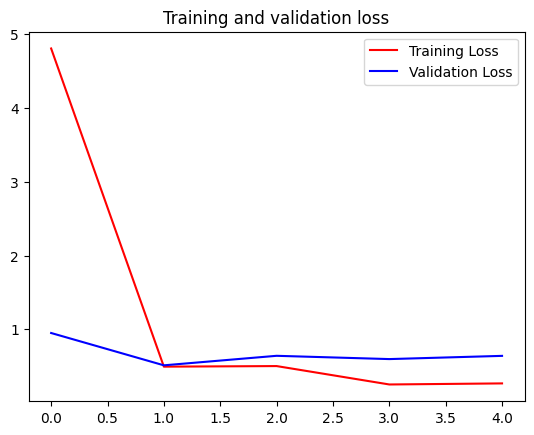

In [13]:
# Plot the model results
acc = sign_model_hist.history['accuracy']
val_acc = sign_model_hist.history['val_accuracy']
loss = sign_model_hist.history['loss']
val_loss = sign_model_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()